In [33]:
#importation des librairies utiles
from sklearn.datasets import fetch_openml 
import sklearn.model_selection as ms
import sklearn.neural_network as nn
import sklearn.metrics as m
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#récupération de la base de données "mnist" et définition des données de test et d'entraînement 
mnist = fetch_openml('mnist_784')
size=49000/70000 #on sélectionne 49000 échantillons  de tests sur les 70000

xtrain, xtest, ytrain, ytest = ms.train_test_split(mnist.data, mnist.target,train_size=size)

In [44]:
#création et entraînement d'un réseau de neuronnes à 50 couches
MyClassifier=nn.MLPClassifier(hidden_layer_sizes = (50))
deb = time.time()
MyClassifier.fit(xtrain,ytrain)
fin = time.time()

In [8]:
"""affichage de la classe de l'image 4, de sa classe prédite et des probabilités d'identification 
du modèle pour chaque classe"""
print("classe predite pour image 4 = ", MyClassifier.predict([xtest[4]])[0],"\n")
print("classe de l'image 4 = ", ytest[4],"\n")
print("probabilité d'identification correspondant à l'image 4 pour chaque classe = \n", MyClassifier.predict_proba([xtest[4]])[0],"\n")

classe predite pour image 4 =  7 

classe de l'image 4 =  7 

probabilité d'identification correspondant à l'image 4 pour chaque classe = 
 [5.67137774e-86 1.10693504e-39 4.30479284e-47 1.33528459e-36
 6.08983092e-22 2.36389223e-36 1.02399564e-79 1.00000000e+00
 3.16007645e-59 1.77245497e-16] 



In [31]:
#affichage de la précision, temps d'entraînement et pourcentage d'erreur du réseau avec les paramètres implémentés
prec1 = m.precision_score(ytest,MyClassifier.predict(xtest),average='micro')
tps1 = fin-deb
err1= m.zero_one_loss(ytest, MyClassifier.predict(xtest))

print("precision = ",prec1)
print("temps d'entraînement = ",tps1)
print("pourcentage d'erreur = ",err1)

precision =  0.9453333333333334
temps d'entraînement =  175.44262981414795
pourcentage d'erreur =  0.05466666666666664


In [10]:
list_nbCouches = [2,10,20,40] #liste avec le nombre de couches étudiés
listTps_h = [] #liste des temps de calcul pour chaque nombre de couches du réseau
listPrec_h = []#liste des précisions pour chaque nombre de couches du réseau
listErr_h =[] #list des erreurs liées au package metrics.zero_one_loss() pour chaque nombre de couches du réseau

#affichage données intéressantes pour un réseau pour 2 couches cachées de 50 neuronnes
MyClassifier_h2=nn.MLPClassifier(hidden_layer_sizes = (50,50))

deb = time.time()
MyClassifier_h2.fit(xtrain,ytrain) #entraînement
fin = time.time()
tps_h2=fin-deb #calcul temps d'entraînement
listTps_h.append(tps_h2)

err_h2 = m.zero_one_loss(ytest, MyClassifier_h2.predict(xtest)) #calcul fraction d'erreur
listErr_h.append(err_h2)

prec_h2 = m.precision_score(ytest,MyClassifier_h2.predict(xtest),average='micro') #calcul précision
listPrec_h.append(prec_h2)
print("nb couches = ",2,"; nb neuronnes = 50 ;","precision = ",prec_h2,"\n")
print("pourcentage d'erreur = ",err_h2,"; temps d'entraînement = ",tps_h2)

nb couches =  2 ; nb neuronnes = 50 ; precision =  0.959952380952381 

pourcentage d'erreur =  0.040047619047619 ; temps d'entraînement =  111.96717667579651


In [11]:
#affichage données intéressantes pour un réseau de 10 couches cachées de 50 neuronnes
listHidden_10 =[50 for k in range(1,11)]

MyClassifier_h10=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_10)) 

deb = time.time()
MyClassifier_h10.fit(xtrain,ytrain)
fin = time.time()
tps_h10=fin-deb
listTps_h.append(tps_h10)

err_h10 = m.zero_one_loss(ytest, MyClassifier_h10.predict(xtest))
listErr_h.append(err_h10)

prec_h10 = m.precision_score(ytest,MyClassifier_h10.predict(xtest),average='micro')
listPrec_h.append(prec_h10)
print("nb couches = ",10,"; nb neuronnes = 50 ;","precision = ",prec_h10,"\n")
print("pourcentage d'erreur = ",err_h10,"; temps d'entraînement = ",tps_h10)

nb couches =  10 ; nb neuronnes = 50 ; precision =  0.9668095238095238 

pourcentage d'erreur =  0.033190476190476215 ; temps d'entraînement =  149.68545365333557


In [12]:
#affichage données intéressantes pour un réseau de 20 couches cachées de 50 neuronnes

listHidden_20 =[50 for k in range(1,21)]
MyClassifier_h20=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_20))

deb = time.time()
MyClassifier_h20.fit(xtrain,ytrain)
fin = time.time()
tps_h20=fin-deb
listTps_h.append(tps_h20)

err_h20 = m.zero_one_loss(ytest, MyClassifier_h20.predict(xtest))
listErr_h.append(err_h20)

prec_h20 = m.precision_score(ytest,MyClassifier_h20.predict(xtest),average='micro')
listPrec_h.append(prec_h20)
print("nb couches = ",20,"; nb neuronnes = 50 ;","precision = ",prec_h20,"\n")
print("pourcentage d'erreur = ",err_h20,"; temps d'entraînement = ",tps_h20)

nb couches =  20 ; nb neuronnes = 50 ; precision =  0.9658571428571429 

pourcentage d'erreur =  0.03414285714285714 ; temps d'entraînement =  320.46253633499146


In [13]:
#affichage données intéressantes pour un réseau avec 20 couches cachées de 50 neuronnes

listHidden_40 =[50 for k in range(1,41)]
MyClassifier_h40=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_40))

deb = time.time()
MyClassifier_h40.fit(xtrain,ytrain)
fin = time.time()
tps_h40=fin-deb
listTps_h.append(tps_h40)

err_h40 = m.zero_one_loss(ytest, MyClassifier_h40.predict(xtest))
listErr_h.append(err_h40)

prec_h40 = m.precision_score(ytest,MyClassifier_h40.predict(xtest),average='micro')
listPrec_h.append(prec_h40)
print("nb couches = ",40,"; nb neuronnes = 50 ;","precision = ",prec_h40,"\n")
print("pourcentage d'erreur = ",err_h40,"; temps d'entraînement = ",tps_h40)

nb couches =  40 ; nb neuronnes = 50 ; precision =  0.644 

pourcentage d'erreur =  0.356 ; temps d'entraînement =  119.3747706413269


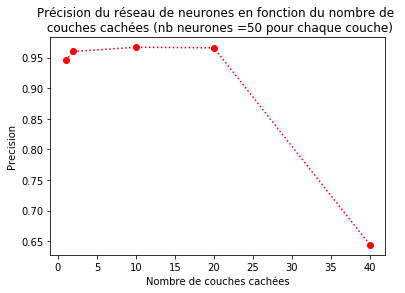

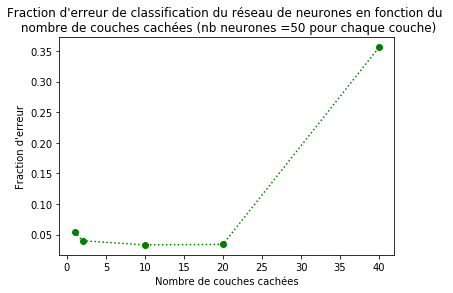

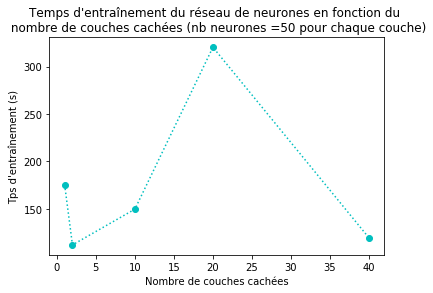

In [94]:
#tracé des courbes fraction erreur/précision/temps d'entraînement en fonction du nombre de couches
%matplotlib inline 
list_nbCouches=list_nbCouches[-4:] #ré-initialisation des listes
listPrec_h = listPrec_h[-4:]
listErr_h = listErr_h[-4:]
listTps_h = listTps_h[-4:]

list_nbCouches.insert(0,1) #ajout des données pour nb couche =1
listPrec_h.insert(0,prec1)
listTps_h.insert(0,tps1)
listErr_h.insert(0,err1)

plt.title("Précision du réseau de neurones en fonction du nombre de \n couches cachées (nb neurones =50 pour chaque couche)")
plt.plot(np.array(list_nbCouches), np.array(listPrec_h), "r:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Precision")
plt.show()

plt.title("Fraction d'erreur de classification du réseau de neurones en fonction du \n nombre de couches cachées (nb neurones =50 pour chaque couche)")
plt.plot(np.array(list_nbCouches), np.array(listErr_h), "g:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Fraction d'erreur")
plt.show()

plt.title("Temps d'entraînement du réseau de neurones en fonction du \n nombre de couches cachées (nb neurones =50 pour chaque couche)")
plt.plot(np.array(list_nbCouches), np.array(listTps_h), "c:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Tps d'entraînement (s)")
plt.show()



In [14]:
list_nbCouches_nDec = [10,20,40] #liste des nombres de couches étudiés dans cette partie
listTps_nDec = [] #liste des temps de calcul pour chaque nombre de couches du réseau
listPrec_nDec = []#liste des précisions pour chaque nombre de couches du réseau
listErr_nDec =[] #liste des fractions d'erreur pour chaque nombre de couches du réseau

#affichage des données intéressantes pour un réseau de 10 couches avec un nombre de neurones dégressif (60 à 10)
nb_hidden = 10
pas = 50//nb_hidden #calcul pas pour obtenir le nombre de neurones par couche
listHid_nDec10=[60-(i*pas) for i in range(0,nb_hidden)] #liste des nombres de neurones

MyClassifier_nDec10=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec10))

deb=time.time()
MyClassifier_nDec10.fit(xtrain,ytrain)
fin=time.time()
tps_nDec10=fin-deb
listTps_nDec.append(tps_nDec10)

err_nDec10 = m.zero_one_loss(ytest, MyClassifier_nDec10.predict(xtest))
listErr_nDec.append(err_nDec10)

prec_nDec10 = m.precision_score(ytest,MyClassifier_nDec10.predict(xtest),average='micro')
listPrec_nDec.append(prec_nDec10)

print("nb couches = ",10,"; nb neuronnes = dégressif ;","precision = ",prec_nDec10,"\n")
print("pourcentage d'erreur = ",err_nDec10,"; temps d'entraînement = ",tps_nDec10)

nb couches =  10 ; nb neuronnes = dégressif ; precision =  0.972047619047619 

pourcentage d'erreur =  0.02795238095238095 ; temps d'entraînement =  106.33006072044373


In [15]:
#affichage des données intéressantes pour un réseau de 20 couches avec un nombre de neurones dégressif (60 à 10)
nb_hidden = 20
pas = 50//nb_hidden
listHid_nDec20=[60-(i*pas) for i in range(0,nb_hidden)]

MyClassifier_nDec20=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20))

deb=time.time()
MyClassifier_nDec20.fit(xtrain,ytrain)
fin=time.time()
tps_nDec20=fin-deb
listTps_nDec.append(tps_nDec20)

err_nDec20 = m.zero_one_loss(ytest, MyClassifier_nDec20.predict(xtest))
listErr_nDec.append(err_nDec20)

prec_nDec20 = m.precision_score(ytest,MyClassifier_nDec20.predict(xtest),average='micro')
listPrec_nDec.append(prec_nDec20)

print("nb couches = ",nb_hidden,"; nb neuronnes = dégressif ;","precision = ",prec_nDec20,"\n")
print("pourcentage d'erreur = ",err_nDec20,"; temps d'entraînement = ",tps_nDec20)

nb couches =  20 ; nb neuronnes = dégressif ; precision =  0.9722857142857143 

pourcentage d'erreur =  0.02771428571428569 ; temps d'entraînement =  145.27302861213684


In [16]:
#affichage des données intéressantes pour un réseau de 40 couches avec un nombre de neurones dégressif (60 à 10)
nb_hidden = 40
pas = 50//nb_hidden
listHid_nDec40=[60-(i*pas) for i in range(0,nb_hidden)]

MyClassifier_nDec40=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec40))

deb=time.time()
MyClassifier_nDec40.fit(xtrain,ytrain)
fin=time.time()
tps_nDec40=fin-deb
listTps_nDec.append(tps_nDec40)

err_nDec40 = m.zero_one_loss(ytest, MyClassifier_nDec40.predict(xtest))
listErr_nDec.append(err_nDec40)

prec_nDec40 = m.precision_score(ytest,MyClassifier_nDec40.predict(xtest),average='micro')
listPrec_nDec.append(prec_nDec40)

print("nb couches = ",nb_hidden,"; nb neuronnes = dégressif ;","precision = ",prec_nDec40,"\n")
print("pourcentage d'erreur = ",err_nDec40,"; temps d'entraînement = ",tps_nDec40)

nb couches =  40 ; nb neuronnes = dégressif ; precision =  0.7386666666666667 

pourcentage d'erreur =  0.2613333333333333 ; temps d'entraînement =  142.15689253807068


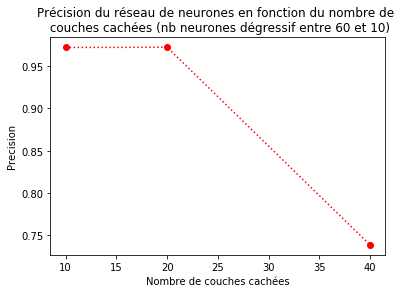

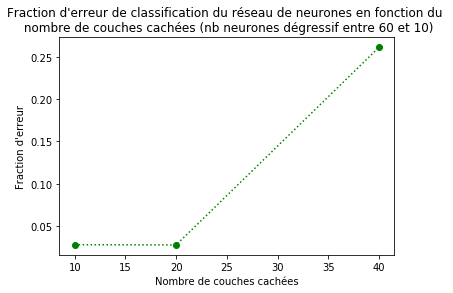

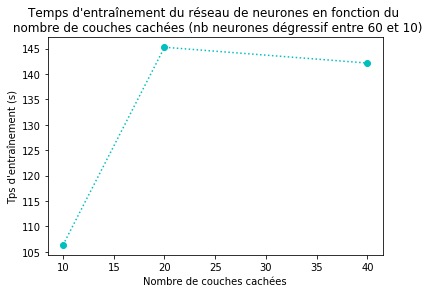

In [92]:
#tracé des courbes fraction erreur/précision/temps d'entraînement en fonction du nombre de couches
%matplotlib inline 

plt.title("Précision du réseau de neurones en fonction du nombre de \n couches cachées (nb neurones dégressif entre 60 et 10)")
plt.plot(np.array(list_nbCouches_nDec), np.array(listPrec_nDec), "r:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Precision")
plt.show()

plt.title("Fraction d'erreur de classification du réseau de neurones en fonction du \n nombre de couches cachées (nb neurones dégressif entre 60 et 10)")
plt.plot(np.array(list_nbCouches_nDec), np.array(listErr_nDec), "g:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Fraction d'erreur")
plt.show()

plt.title("Temps d'entraînement du réseau de neurones en fonction du \n nombre de couches cachées (nb neurones dégressif entre 60 et 10)")
plt.plot(np.array(list_nbCouches_nDec), np.array(listTps_nDec), "c:o")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Tps d'entraînement (s)")
plt.show()

In [17]:
list_solver = ['lbfgs','sgd','adam'] #liste contenant le nom des différents solver du modèle
listTps_sol = [] #liste des temps de calcul associés au nombre de couches et au solver
listPrec_sol = []#liste des précisions associés au nombre de couches et au solver
listErr_sol =[] #liste des fractions d'erreurs associés au nombre de couches et au solver

#affichage des données intéressantes pour un réseau de 10 couches de 50 neurones pour le solver lbfgs

MyClassifier_solLb10=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_10),solver='lbfgs')

deb=time.time()
MyClassifier_solLb10.fit(xtrain,ytrain)
fin=time.time()
tps_solLb10=fin-deb
listTps_sol.append(tps_solLb10)

err_solLb10 = m.zero_one_loss(ytest, MyClassifier_solLb10.predict(xtest))
listErr_sol.append(err_solLb10)

prec_solLb10 = m.precision_score(ytest,MyClassifier_solLb10.predict(xtest),average='micro')
listPrec_sol.append(prec_solLb10)

print("solver = lbfgs\n")
print("nb couches = ",10,"; nb neuronnes = 50;","precision = ",prec_solLb10,"\n")
print("pourcentage d'erreur = ",err_solLb10,"; temps d'entraînement = ",tps_solLb10)



solver = lbfgs

nb couches =  10 ; nb neuronnes = 50; precision =  0.9473333333333334 

pourcentage d'erreur =  0.05266666666666664 ; temps d'entraînement =  206.01039242744446


In [18]:
#affichage des données intéressantes pour un réseau de 40 couches de 50 neurones pour le solver lbfgs
MyClassifier_solLb40=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_40),solver='lbfgs')
deb=time.time()
MyClassifier_solLb40.fit(xtrain,ytrain)
fin=time.time()
tps_solLb40=fin-deb
listTps_sol.append(tps_solLb40)

err_solLb40 = m.zero_one_loss(ytest, MyClassifier_solLb40.predict(xtest))
listErr_sol.append(err_solLb40)

prec_solLb40 = m.precision_score(ytest,MyClassifier_solLb40.predict(xtest),average='micro')
listPrec_sol.append(prec_solLb40)

print("solver = lbfgs\n")
print("nb couches = ",40,"; nb neuronnes = 50;","precision = ",prec_solLb40,"\n")
print("pourcentage d'erreur = ",err_solLb40,"; temps d'entraînement = ",tps_solLb40)


solver = lbfgs

nb couches =  40 ; nb neuronnes = 50; precision =  0.11347619047619048 

pourcentage d'erreur =  0.8865238095238095 ; temps d'entraînement =  21.9049334526062


In [19]:
#affichage des données intéressantes pour un réseau de 10 couches de 50 neurones pour le solver sgd
MyClassifier_solSgd10=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_10),solver='sgd')
deb=time.time()
MyClassifier_solSgd10.fit(xtrain,ytrain)
fin=time.time()
tps_solSgd10=fin-deb
listTps_sol.append(tps_solSgd10)

err_solSgd10 = m.zero_one_loss(ytest, MyClassifier_solSgd10.predict(xtest))
listErr_sol.append(err_solSgd10)

prec_solSgd10 = m.precision_score(ytest,MyClassifier_solSgd10.predict(xtest),average='micro')
listPrec_sol.append(prec_solSgd10)

print("solver = sgd\n")
print("nb couches = ",10,"; nb neuronnes = 50;","precision = ",prec_solSgd10,"\n")
print("pourcentage d'erreur = ",err_solSgd10,"; temps d'entraînement = ",tps_solSgd10)

solver = sgd

nb couches =  10 ; nb neuronnes = 50; precision =  0.9614285714285714 

pourcentage d'erreur =  0.03857142857142859 ; temps d'entraînement =  135.7246584892273


In [20]:
#affichage des données intéressantes pour un réseau de 40 couches de 50 neurones pour le solver sgd
MyClassifier_solSgd40=nn.MLPClassifier(hidden_layer_sizes = tuple(listHidden_40),solver='sgd')
deb=time.time()
MyClassifier_solSgd40.fit(xtrain,ytrain)
fin=time.time()
tps_solSgd40=fin-deb
listTps_sol.append(tps_solSgd40)

err_solSgd40 = m.zero_one_loss(ytest, MyClassifier_solSgd40.predict(xtest))
listErr_sol.append(err_solSgd40)

prec_solSgd40 = m.precision_score(ytest,MyClassifier_solSgd40.predict(xtest),average='micro')
listPrec_sol.append(prec_solSgd40)

print("solver = sgd\n")
print("nb couches = ",40,"; nb neuronnes = 50;","precision = ",prec_solSgd40,"\n")
print("pourcentage d'erreur = ",err_solSgd40,"; temps d'entraînement = ",tps_solSgd40)

solver = sgd

nb couches =  40 ; nb neuronnes = 50; precision =  0.11347619047619048 

pourcentage d'erreur =  0.8865238095238095 ; temps d'entraînement =  63.38944602012634


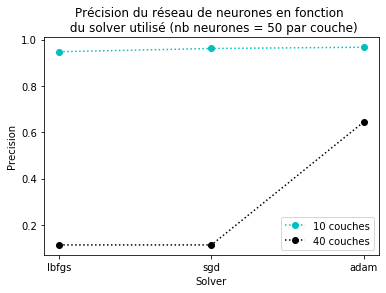

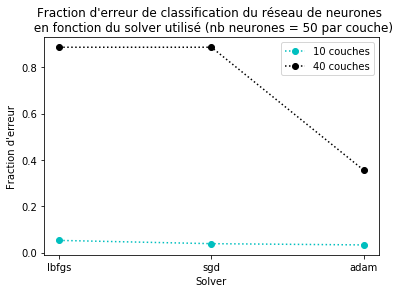

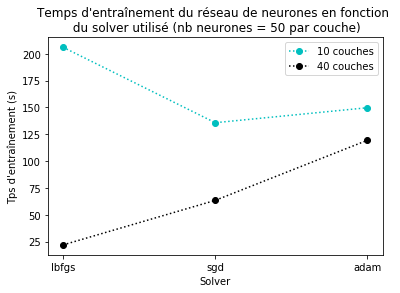

In [95]:
#tracé des courbes fraction erreur/précision/temps d'entraînement en fonction du solver utilisé
%matplotlib inline 
listPrec_sol= listPrec_sol[:4] #phase ré-initialisation des listes
listErr_sol=listErr_sol[:4]
listTps_sol=listTps_sol[:4]

listPrec_sol.append(prec_h10)#ajout données pour solver "adam" (défault)
listPrec_sol.append(prec_h40)
listErr_sol.append(err_h10)
listErr_sol.append(err_h40)
listTps_sol.append(tps_h10)
listTps_sol.append(tps_h40)

listPrec_sol10 = listPrec_sol[::2] #séparation entre données pour 10 et 40 couches
listPrec_sol40 = listPrec_sol[1:6:2]
listErr_sol10 = listErr_sol[::2]
listErr_sol40 = listErr_sol[1:6:2]
listTps_sol10 = listTps_sol[::2]
listTps_sol40 = listTps_sol[1:6:2]

plt.title("Précision du réseau de neurones en fonction \n du solver utilisé (nb neurones = 50 par couche)")
plt.plot(np.array(list_solver), np.array(listPrec_sol10), "c:o",label="10 couches")
plt.plot(np.array(list_solver), np.array(listPrec_sol40), "k:o",label="40 couches")
plt.legend()
plt.xlabel("Solver")
plt.ylabel("Precision")
plt.show()

plt.title("Fraction d'erreur de classification du réseau de neurones \n en fonction du solver utilisé (nb neurones = 50 par couche)")
plt.plot(np.array(list_solver), np.array(listErr_sol10 ), "c:o",label="10 couches")
plt.plot(np.array(list_solver), np.array(listErr_sol40), "k:o",label="40 couches")
plt.legend()
plt.xlabel("Solver")
plt.ylabel("Fraction d'erreur")
plt.show()

plt.title("Temps d'entraînement du réseau de neurones en fonction \n du solver utilisé (nb neurones = 50 par couche)")
plt.plot(np.array(list_solver), np.array(listTps_sol10), "c:o",label="10 couches")
plt.plot(np.array(list_solver), np.array(listTps_sol40), "k:o",label="40 couches")
plt.legend()
plt.xlabel("Solver")
plt.ylabel("Tps d'entraînement (s)")
plt.show()



In [21]:
listTps_act = [] #liste des temps de calcul pour chaque fonction d'actualisation
listPrec_act = []#liste des précisions pour chaque fonction d'actualisation
listErr_act =[] #liste des fractions d'erreurs pour chaque fonction d'actualisation

#affichage des données intéressantes pour un réseau de 20 couchesn nb neurones dégressif pour la fonction "identity"

MyClassifier_actId=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),activation='identity')
deb=time.time()
MyClassifier_actId.fit(xtrain,ytrain)
fin=time.time()
tps_actId=fin-deb
listTps_act.append(tps_actId)

err_actId = m.zero_one_loss(ytest, MyClassifier_actId.predict(xtest))
listErr_act.append(err_actId)

prec_actId = m.precision_score(ytest,MyClassifier_actId.predict(xtest),average='micro')
listPrec_act.append(prec_actId)

print("activation = identity\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_actId,"\n")
print("pourcentage d'erreur = ",err_actId,"; temps d'entraînement = ",tps_actId)


activation = identity

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.9037619047619048 

pourcentage d'erreur =  0.09623809523809523 ; temps d'entraînement =  66.51384615898132


In [22]:
#affichage des données intéressantes pour un réseau de 20 couchesn nb neurones dégressif pour la fonction "logistic"
MyClassifier_actLog=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),activation='logistic')
deb=time.time()
MyClassifier_actLog.fit(xtrain,ytrain)
fin=time.time()
tps_actLog=fin-deb
listTps_act.append(tps_actLog)

err_actLog = m.zero_one_loss(ytest, MyClassifier_actLog.predict(xtest))
listErr_act.append(err_actLog)

prec_actLog = m.precision_score(ytest,MyClassifier_actLog.predict(xtest),average='micro')
listPrec_act.append(prec_actLog)

print("activation = logistic\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_actLog,"\n")
print("pourcentage d'erreur = ",err_actLog,"; temps d'entraînement = ",tps_actLog)

activation = logistic

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.11347619047619048 

pourcentage d'erreur =  0.8865238095238095 ; temps d'entraînement =  70.74354529380798


In [23]:
#affichage des données intéressantes pour un réseau de 20 couchesn nb neurones dégressif pour la fonction "tanh"
MyClassifier_actTanh=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),activation='tanh')
deb=time.time()
MyClassifier_actTanh.fit(xtrain,ytrain)
fin=time.time()
tps_actTanh=fin-deb
listTps_act.append(tps_actTanh)

err_actTanh = m.zero_one_loss(ytest, MyClassifier_actTanh.predict(xtest))
listErr_act.append(err_actTanh)

prec_actTanh = m.precision_score(ytest,MyClassifier_actTanh.predict(xtest),average='micro')
listPrec_act.append(prec_actTanh)

print("activation = tanh\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_actTanh,"\n")
print("pourcentage d'erreur = ",err_actTanh,"; temps d'entraînement = ",tps_actTanh)

activation = tanh

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.9288571428571428 

pourcentage d'erreur =  0.07114285714285717 ; temps d'entraînement =  175.98295640945435


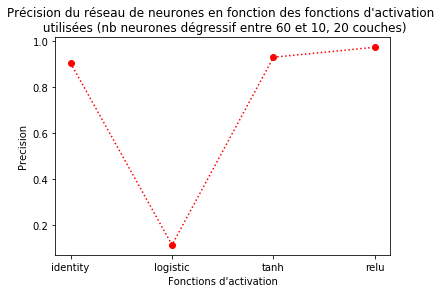

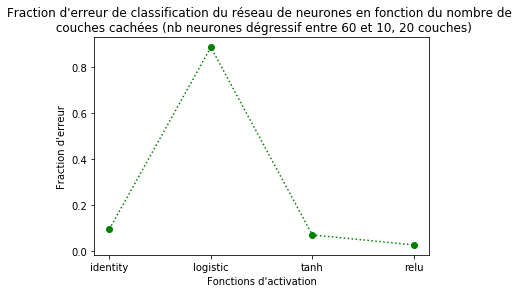

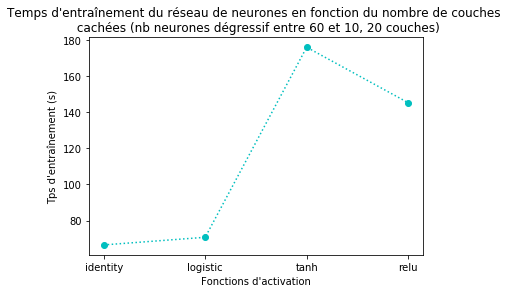

In [96]:
#tracé des courbes fraction erreur/précision/temps d'entraînement en fonction de la fonction d'actualisation utilisée
%matplotlib inline 
listPrec_act=listPrec_act[:3] #ré-initilisation des listes
listErr_act=listErr_act[:3]
listTps_act=listTps_act[:3]

listPrec_act.append(prec_nDec20) #ajout des valeurs pour la fonction "relu" (défaut)
listErr_act.append(err_nDec20)
listTps_act.append(tps_nDec20)

list_act = ['identity','logistic','tanh','relu']# liste des fonctions d'actualisation

plt.title("Précision du réseau de neurones en fonction des fonctions d'activation \n utilisées (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_act), np.array(listPrec_act), "r:o")
plt.xlabel("Fonctions d'activation")
plt.ylabel("Precision")
plt.show()

plt.title("Fraction d'erreur de classification du réseau de neurones en fonction du nombre de \n couches cachées (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_act), np.array(listErr_act), "g:o")
plt.xlabel("Fonctions d'activation")
plt.ylabel("Fraction d'erreur")
plt.show()

plt.title("Temps d'entraînement du réseau de neurones en fonction du nombre de couches \n cachées (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_act), np.array(listTps_act), "c:o")
plt.xlabel("Fonctions d'activation")
plt.ylabel("Tps d'entraînement (s)")
plt.show()

In [24]:
listTps_alpha = [] #liste des temps de calcul pour chaque alpha
listPrec_alpha = []#liste des précisions pour chaque alpha
listErr_alpha =[] #liste des fractions d'erreur pour chaque alpha

#affichage des données intéressantes pour un réseau de 20 couches, nb neurones dégressif pouralpha=0.00001

MyClassifier_alpha1=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),alpha = 0.00001)
deb=time.time()
MyClassifier_alpha1.fit(xtrain,ytrain)
fin=time.time()
tps_alpha1=fin-deb
listTps_alpha.append(tps_alpha1)

err_alpha1 = m.zero_one_loss(ytest, MyClassifier_alpha1.predict(xtest))
listErr_alpha.append(err_alpha1)

prec_alpha1 = m.precision_score(ytest,MyClassifier_alpha1.predict(xtest),average='micro')
listPrec_alpha.append(prec_alpha1)

print("alpha = 0.00001\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_alpha1,"\n")
print("pourcentage d'erreur = ",err_alpha1,"; temps d'entraînement = ",tps_alpha1)

alpha = 0.00001

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.9729523809523809 

pourcentage d'erreur =  0.027047619047619098 ; temps d'entraînement =  188.62858176231384


In [25]:
#affichage des données intéressantes pour un réseau de 20 couches, nb neurones dégressif pouralpha=0.001
MyClassifier_alpha2=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),alpha = 0.001)
deb=time.time()
MyClassifier_alpha2.fit(xtrain,ytrain)
fin=time.time()
tps_alpha2=fin-deb
listTps_alpha.append(tps_alpha2)

err_alpha2 = m.zero_one_loss(ytest, MyClassifier_alpha2.predict(xtest))
listErr_alpha.append(err_alpha2)

prec_alpha2 = m.precision_score(ytest,MyClassifier_alpha2.predict(xtest),average='micro')
listPrec_alpha.append(prec_alpha2)

print("alpha = 0.001\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_alpha2,"\n")
print("pourcentage d'erreur = ",err_alpha2,"; temps d'entraînement = ",tps_alpha2)

alpha = 0.001

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.9719047619047619 

pourcentage d'erreur =  0.028095238095238062 ; temps d'entraînement =  141.01745986938477


In [26]:
#affichage des données intéressantes pour un réseau de 20 couches, nb neurones dégressif pouralpha=0.01
MyClassifier_alpha3=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),alpha = 0.01)
deb=time.time()
MyClassifier_alpha3.fit(xtrain,ytrain)
fin=time.time()
tps_alpha3=fin-deb
listTps_alpha.append(tps_alpha3)

err_alpha3 = m.zero_one_loss(ytest, MyClassifier_alpha3.predict(xtest))
listErr_alpha.append(err_alpha3)

prec_alpha3 = m.precision_score(ytest,MyClassifier_alpha3.predict(xtest),average='micro')
listPrec_alpha.append(prec_alpha3)

print("alpha = 0.01\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_alpha3,"\n")
print("pourcentage d'erreur = ",err_alpha3,"; temps d'entraînement = ",tps_alpha3)

alpha = 0.01

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.974047619047619 

pourcentage d'erreur =  0.02595238095238095 ; temps d'entraînement =  199.70905375480652


In [27]:
#affichage des données intéressantes pour un réseau de 20 couches, nb neurones dégressif pouralpha=0.1
MyClassifier_alpha4=nn.MLPClassifier(hidden_layer_sizes = tuple(listHid_nDec20),alpha = 0.1)
deb=time.time()
MyClassifier_alpha4.fit(xtrain,ytrain)
fin=time.time()
tps_alpha4=fin-deb
listTps_alpha.append(tps_alpha4)

err_alpha4 = m.zero_one_loss(ytest, MyClassifier_alpha3.predict(xtest))
listErr_alpha.append(err_alpha4)

prec_alpha4 = m.precision_score(ytest,MyClassifier_alpha4.predict(xtest),average='micro')
listPrec_alpha.append(prec_alpha4)

print("alpha = 0.1\n")
print("nb couches = ",20,"; nb neuronnes = dégressif;","precision = ",prec_alpha4,"\n")
print("pourcentage d'erreur = ",err_alpha4,"; temps d'entraînement = ",tps_alpha4)

alpha = 0.1

nb couches =  20 ; nb neuronnes = dégressif; precision =  0.9681904761904762 

pourcentage d'erreur =  0.02595238095238095 ; temps d'entraînement =  328.56458377838135


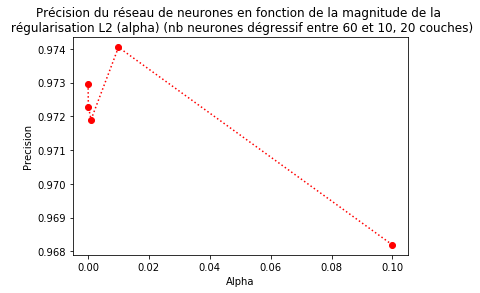

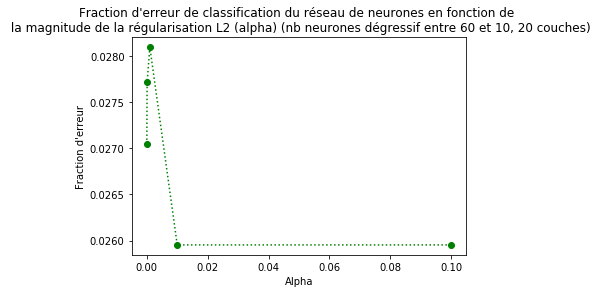

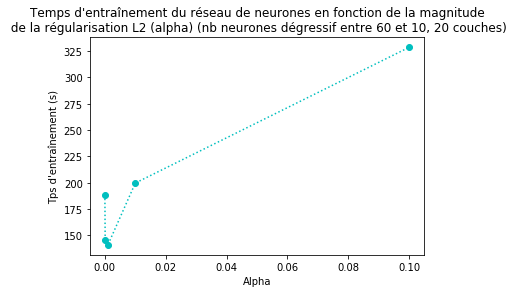

In [97]:
#tracé des courbes fraction erreur/précision/temps d'entraînement en fonction du paramètre alpha
%matplotlib inline 
list_alpha = [0.00001,0.0001,0.001,0.01,0.1]#liste des coefficients alpha

listPrec_alpha=[prec_alpha1,prec_alpha2,prec_alpha3,prec_alpha4] #ré-initialisation des listes
listErr_alpha=[err_alpha1,err_alpha2,err_alpha3,err_alpha4]
listTps_alpha=[tps_alpha1,tps_alpha2,tps_alpha3,tps_alpha4]

listPrec_alpha.insert(1,prec_nDec20)#insertion des valeurs pour alpha=0.0001
listErr_alpha.insert(1,err_nDec20)
listTps_alpha.insert(1,tps_nDec20)

plt.title("Précision du réseau de neurones en fonction de la magnitude de la \n régularisation L2 (alpha) (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_alpha), np.array(listPrec_alpha), "r:o")
plt.xlabel("Alpha")
plt.ylabel("Precision")
plt.show()

plt.title("Fraction d'erreur de classification du réseau de neurones en fonction de \n la magnitude de la régularisation L2 (alpha) (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_alpha), np.array(listErr_alpha), "g:o")
plt.xlabel("Alpha")
plt.ylabel("Fraction d'erreur")
plt.show()

plt.title("Temps d'entraînement du réseau de neurones en fonction de la magnitude\n de la régularisation L2 (alpha) (nb neurones dégressif entre 60 et 10, 20 couches)")
plt.plot(np.array(list_alpha), np.array(listTps_alpha), "c:o")
plt.xlabel("Alpha")
plt.ylabel("Tps d'entraînement (s)")
plt.show()